In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from numpy import linalg as LA

import math
from scipy.integrate import quad

from scipy.integrate import nquad


We consider the SET (Single-electron transistor)

$$
H=\epsilon d^{\dagger} d+\sum_{\nu} \sum_{k}\left[\epsilon_{k \nu} c_{k \nu}^{\dagger} c_{k \nu}+\left(t_{k \nu} d^{\dagger} c_{k \nu}+\text { h.c. }\right)\right]
$$
with two leads $\nu \in\{L, R\}$ described by Lorentzian spectral densities
$$
\Gamma_{\alpha}^{(0)}(\omega)=2 \pi \sum_{k}\left|t_{k \nu}\right|^{2} \delta\left(\omega-\epsilon_{k \nu}\right)=\Gamma_{\alpha} \frac{\delta_{\alpha}^{2}}{\left(\omega-\epsilon_{\alpha}\right)^{2}+\delta_{\alpha}^{2}}
$$

where $\alpha \in\{L, R\}$ denotes the lead, $\Gamma_{\alpha}$ the coupling strength, $\delta_{\alpha}$ the width, and $\epsilon_{\alpha}$ the frequency with the strongest coupling. The wideband limit is implemented with $\delta_{\alpha} \rightarrow \infty$.

Parameters : 
$\Gamma_{L}=\Gamma_{R}=\Gamma, \beta_{L} \epsilon=\beta_{R} \epsilon=1, \mu_{L}=+\epsilon, \mu_{R}=-\epsilon,  \delta_{L}=\delta_{R}=0.1 \epsilon, \epsilon_{L}=\epsilon_{R}=\epsilon$


First, since the model is exactly solvable, we can use e.g. nonequilibrium Greens functions or the Laplace transform method to obtain an exact solution for the stationary currents in terms of a Landauer representation
$$
I_{M}=\frac{1}{2 \pi} \int d \omega T(\omega)\left[f_{L}(\omega)-f_{R}(\omega)\right] d \omega
$$
where the transmission becomes
$$
T(\omega)=\frac{\Gamma_{L}^{(0)}(\omega) \Gamma_{R}^{(0)}(\omega)}{\left[\omega-\epsilon-\frac{1}{2 \pi} \mathcal{P} \int \frac{\Gamma_{L}^{(0)}\left(\omega^{\prime}\right)+\Gamma_{R}^{(0)}\left(\omega^{\prime}\right)}{\omega-\omega^{\prime}} d \omega^{\prime}\right]^{2}+\left[\frac{\Gamma_{L}^{(0)}\left(\omega^{\prime}\right)+\Gamma_{R}^{(0)}\left(\omega^{\prime}\right)}{2}\right]^{2}}
$$

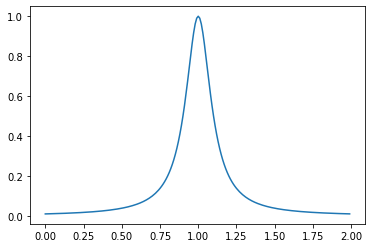

In [2]:
#Parameters
epsilon=1.0
epsilon_l= epsilon
epsilon_r=epsilon

Gamma=1
Gamma_l=Gamma
Gamma_r=Gamma

beta_l=1.0/epsilon
beta_r=1.0/epsilon

mu_l=epsilon
mu_r=-epsilon

delta_l=0.1*epsilon
delta_r=0.1*epsilon

def J_l(w):
    return Gamma_l * delta_l**2 /((w - epsilon_l)**2+ delta_l**2)

def J_r(w):
    return Gamma_r * delta_r**2 /((w - epsilon_r)**2+ delta_r**2)

def f_l(w):
    return 1.0/(np.exp(beta_l*(w-mu_l))+1)

def f_r(w):
    return 1/(np.exp(beta_r*(w-mu_r))+1)

vecfunc_l = np.vectorize(J_l)
w = np.arange(0.0, 2.0, 0.01)
T = vecfunc_l(w)
plt.plot (w, T)
plt.show()


/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: IntegrationWarning: The maximum number of subdivisions (60) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  
/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  
/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the 

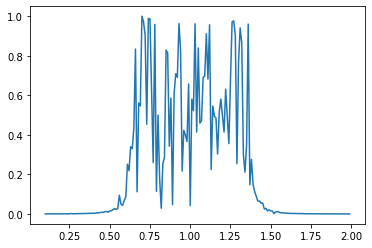

In [3]:
options={'limit':100}

def integrand(w, t):
    return (J_l(w)+J_r(w))/(t-w)


def expint(t):
    return quad(integrand, -np.inf, np.inf, args=(t), limit=60)[0]

def T(w):
    return (J_l(w)*J_r(w))/((w- epsilon - expint(w)/ (2* np.pi))**2+((J_l(w)+J_r(w))/2)**2)


vecfunc = np.vectorize(T)
w = np.arange(0.1, 2.0, 0.01)
Y = vecfunc(w)
plt.plot (w, Y)
plt.show()



def I_M():
    return 1/(2*np.pi) *  quad( T(w)*(f_l(w)- f_r(r)) , -np.inf, np.inf)[0]



Introducing a separate reaction coordinate for each reservoir, the model is transformed into triple quantum dot (TQD) structure
$$
\begin{array}{c}
H=H_{T Q D}+\sum_{\nu} \sum_{k}\left[\varepsilon_{k \nu} d_{k \nu}^{\dagger} d_{k \nu}+\left(T_{k \nu} d_{\nu}^{\dagger} d_{k \nu}+\mathrm{h.c.}\right)\right] \\
H_{T Q D}=\varepsilon_{L} d_{L}^{\dagger} d_{L}+\epsilon d^{\dagger} d+\varepsilon_{R} d_{R}^{\dagger} d_{R}+\left(\lambda_{L} d^{\dagger} d_{L}+\lambda_{R} d^{\dagger} d_{R}+\mathrm{h.c.}\right)
\end{array}
$$
where the coupling strengths and energies of the RC, respectively, become
$$
\lambda_{\nu}=\sqrt{\frac{\Gamma_{\nu} \delta_{\nu}}{2}}, \quad \varepsilon_{\nu}=\epsilon_{\nu}
$$

which  allows to compute the residual spectral density
$$
\Gamma_{\nu}^{(1)}(\omega)=2 \pi \sum_{k}\left|T_{k \nu}\right|^{2} \delta\left(\omega-\varepsilon_{k \nu}\right)=2 \delta_{\nu}
$$

In [4]:
lamda_l= np.sqrt(Gamma_l* delta_l / 2)
Rc_epsilon_l= epsilon_l 

lamda_r= np.sqrt(Gamma_r* delta_r / 2)
Rc_epsilon_r= epsilon_r 

def J1_l(w):
    return 2*delta_l

def J1_r(w):
    return 2*delta_r

d = destroy(2)
d_l=destroy(2)
d_r=destroy(2)

H_TQD= Rc_epsilon_l* tensor(d_l.dag() * d_l ,identity(2) , identity(2)) + epsilon* tensor( identity(2), d.dag() * d , identity(2)) + Rc_epsilon_r* tensor(identity(2) , identity(2), d_r.dag() * d_r )  + lamda_l *tensor( d_l, d.dag() ,identity(2)) + lamda_r *tensor( identity(2), d.dag() , d_r) +  lamda_l *tensor( d_l.dag(), d ,identity(2)) + lamda_r *tensor( identity(2), d , d_r.dag())    
#H_TQD= Rc_epsilon_l* tensor(d_l.dag() * d_l , tensor(identity(2) , identity(2))) + epsilon* tensor( identity(2),tensor( d.dag() * d , identity(2))) + Rc_epsilon_r* tensor(identity(2) , tensor(identity(2), d_r.dag() * d_r ))

H_TQD

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.        0.        0.        0.        0.        0.        0.
  0.       ]
 [0.        1.        0.2236068 0.        0.        0.        0.
  0.       ]
 [0.        0.2236068 1.        0.        0.2236068 0.        0.
  0.       ]
 [0.        0.        0.        2.        0.        0.2236068 0.
  0.       ]
 [0.        0.        0.2236068 0.        1.        0.        0.
  0.       ]
 [0.        0.        0.        0.2236068 0.        2.        0.2236068
  0.       ]
 [0.        0.        0.        0.        0.        0.2236068 2.
  0.       ]
 [0.        0.        0.        0.        0.        0.        0.
  3.       ]]

This results in a local Lindblad master equation [33] for the triple quantum dot
$$
\begin{array}{l}
\dot{\rho}=-\mathrm{i}\left[H_{T Q D}, \rho\right] \\
\quad+\Gamma_{L}^{(1)}\left(\epsilon_{L}\right)\left[1-f_{L}\left(\epsilon_{L}\right)\right]\left[d_{L} \rho d_{L}^{\dagger}-\frac{1}{2}\left\{d_{L}^{\dagger} d_{L}, \rho\right\}\right]+\Gamma_{L}^{(1)}\left(\epsilon_{L}\right) f_{L}\left(\epsilon_{L}\right)\left[d_{L}^{\dagger} \rho d_{L}-\frac{1}{2}\left\{d_{L} d_{L}^{\dagger}, \rho\right\}\right] \\
\quad+\Gamma_{R}^{(1)}\left(\epsilon_{R}\right)\left[1-f_{R}\left(\epsilon_{R}\right)\right]\left[d_{R} \rho d_{R}^{\dagger}-\frac{1}{2}\left\{d_{R}^{\dagger} d_{R}, \rho\right\}\right]+\Gamma_{R}^{(1)}\left(\epsilon_{R}\right) f_{R}\left(\epsilon_{R}\right)\left[d_{R}^{\dagger} \rho d_{R}-\frac{1}{2}\left\{d_{R} d_{R}^{\dagger}, \rho\right\}\right]
\end{array}
$$

In [5]:
l1_l=J1_l(Rc_epsilon_l)*(1-f_l(Rc_epsilon_l))
l2_l=J1_l(Rc_epsilon_l)*f_l(Rc_epsilon_l)
l1_r=J1_l(Rc_epsilon_r)*(1-f_r(Rc_epsilon_r))
l2_r=J1_l(Rc_epsilon_r)*f_r(Rc_epsilon_r)


A1_l=tensor(d_l, identity(2) , identity(2) )
A2_l=tensor(d_l.dag() , identity(2) , identity(2) )

A1_r=tensor(identity(2) , identity(2) , d_r  )
A2_r=tensor(identity(2) , identity(2), d_r.dag()  )

L0=[np.sqrt(l1_l) * A1_l, np.sqrt(l2_l) * A2_l , np.sqrt(l1_r) * A1_r, np.sqrt(l2_r) * A2_r ]

Initial state:


In [6]:
N_l=d_l.dag()*d_l
N_r=d_r.dag()*d_r
N=d.dag()*d

N_s=tensor(N_l,N_r,N)

Exp_l= (- beta_l* ( Rc_epsilon_l*d_l.dag()*d_l- mu_l* N_l ) ).expm()
Exp_r= (- beta_r* ( Rc_epsilon_r*d_r.dag()*d_r- mu_r* N_r ) ).expm()

Z_l=Exp_l.tr()
Z_r=Exp_r.tr()

dot_init=basis(2, 0)
rho_dot=dot_init*dot_init.dag()

rho_init=tensor(Exp_l/Z_l, rho_dot ,Exp_r/Z_r )

rho_init

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0.44039854 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.05960146 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.44039854 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.05960146
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]

In [11]:
t0 = 0.0
tf = 50.0
time_steps = 1000

## Time range
t = np.linspace(0, tf, time_steps)

result = mesolve(H_TQD, rho_init, t, L0)


states=result.states

In [12]:
print(rho_init.ptrace(1))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]


In [13]:
trace=[0 for i in range(len(states))]
p0=[0 for i in range(len(states))]
for i in range(len(states)):
    trace[i]=states[i].ptrace(1)
    p0[i]=expect(N,trace[i])
    
p0[-1]    

0.30759735664431676

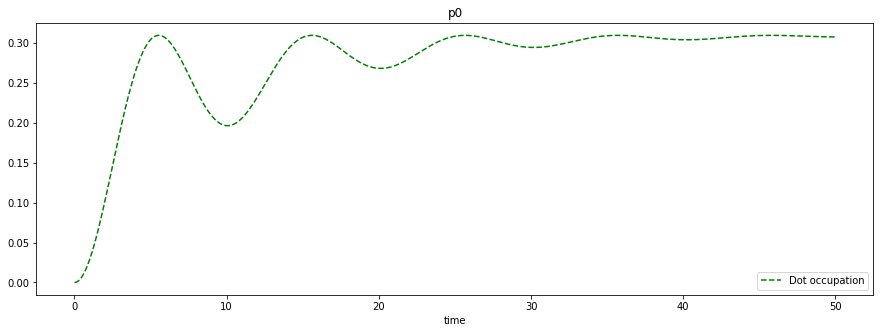

In [14]:
plt.title("p0")
plt.rcParams['figure.figsize'] = [15,5]
plt.plot(t,p0,"--",label='Dot occupation', color = "g")
plt.xlabel("time")
plt.legend()
plt.show()

Matter current:

$$I_M= I_{M}^{(l)}=\operatorname{Tr}\left\{N_{S}\left(\mathcal{L}^{(l)} \rho\right)\right\} $$

$$\mathcal{L}[\hat{A}] \hat{\rho}=\hat{A} \hat{\rho} \hat{A}^{\dagger}-\frac{1}{2}\left\{\hat{A}^{\dagger} \hat{A}, \hat{\rho}\right\}$$

In [15]:
L=  l1_l*(sprepost(A1_l, A2_l) - 1/2.0 *( spre(A2_l*A1_l) + spost(A2_l*A1_l) ) ) +  l2_l*(sprepost(A2_l, A1_l) - 1/2.0 *( spre(A1_l*A2_l) + spost(A1_l*A2_l) ) )

#L= l1_l*lindblad_dissipator(A1_l, A2_l)+  l2_l*lindblad_dissipator(A2_l, A1_l)


I_M=[0 for i in range(len(states))]
aux=[0 for i in range(len(states))]

for i in range(len(states)):
    aux[i]=  l1_l*( A1_l*states[i]*A2_l - 1/2.0 *( A2_l*A1_l *states[i] + states[i]*A2_l*A1_l ) ) +  l2_l*(A2_l *states[i]* A1_l - 1/2.0 *( A1_l*A2_l* states[i] + states[i]*A1_l*A2_l ) )
    I_M[i]= (N_s*aux[i]).tr()
    
    
I_M[-1]      

0.002833005306888589

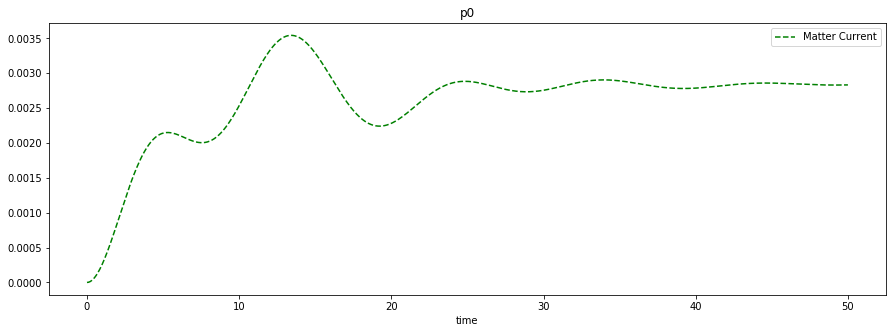

In [16]:

plt.title("p0")
plt.rcParams['figure.figsize'] = [15,5]
plt.plot(t,I_M,"--",label='Matter Current', color = "g")
plt.xlabel("time")
plt.legend()
plt.show()

for $$ \epsilon_l= \epsilon_r=0 $$ we obtain the occupation:
$$
\begin{aligned}
n(t) =e^{-\Gamma t} n_{0}+\sum_{\nu} \int d \omega \Gamma_{\nu} f_{\nu}(\omega) \frac{4}{2 \pi} \frac{1-2 e^{-\Gamma t / 2} \cos [(\omega-\epsilon) t]+e^{-\Gamma t}}{\Gamma^{2}+4(\omega-\epsilon)^{2}}
\end{aligned}
$$

In [17]:
def integrand(w, t):
    return Gamma_l*f_l(w)*4/(2*np.pi)*(1- 2*np.exp(-(Gamma_l+Gamma_r)*t/2 ) *np.cos((w-epsilon)*t) + np.exp(-(Gamma_l+Gamma_r)*t ) ) /( (Gamma_l+Gamma_r)**2 + 4*(w-epsilon)**2) + Gamma_r*f_r(w)*4/(2*np.pi)*(1- 2*np.exp(-(Gamma_l+Gamma_r)*t/2 ) *np.cos((w-epsilon)*t) + np.exp(-(Gamma_l+Gamma_r)*t ) ) /( (Gamma_l+Gamma_r)**2 + 4*(w-epsilon)**2    )     

def aux2(t):
    return quad(integrand, -np.inf, np.inf, args=(t), limit=200)[0]

def n(t):
    return np.exp(-(Gamma_l+Gamma_r)*t )* n0 + aux2(t)

$$
\bar{n}=\sum_{\nu} \int d \omega \Gamma_{\nu} f_{\nu}(\omega) \frac{2}{\pi} \frac{1}{\Gamma^{2}+4(\omega-\epsilon)^{2}}
$$

In [18]:
def integrand2(w):
    return Gamma_l*f_l(w)*2/np.pi /((Gamma_l+Gamma_r)**2 + 4*(w-epsilon)**2) + Gamma_r*f_r(w)*2/np.pi /((Gamma_l+Gamma_r)**2 + 4*(w-epsilon)**2)

def nbar():
    return quad(integrand2, -np.inf, np.inf,  limit=200)[0]

nbar()

/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


0.36478144511308686